In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt

In [2]:
def weighted_random_question(agreement_val, correct_ans):
    my_list = []
    for i in np.arange(1, 6):
        if i == correct_ans:
            my_list += [str(correct_ans)] * int(agreement_val * 100)
        else:
            my_list += [str(i)] * int((1 - agreement_val) / abs(correct_ans - i) * 100)
    return int(rand.choice(my_list))

In [70]:
def weighted_random_pos_old(agreement_val, correct_ans, source_length):
    pos_range = int((1 - agreement_val) ** 2 / 2 * source_length)
    start = correct_ans - pos_range
    end = correct_ans + pos_range + 1
    if start < 0:
        start = 0
    if end > source_length:
        end = source_length
    interval = np.arange(start, end)
    result = []
    for i in interval:
        if i == correct_ans:
            result += [str(i)] * int(agreement_val ** 2 * 100)
        else:
            result += [str(i)] * int(agreement_val ** 2/ (abs(correct_ans - i)) * 100)
    return int(rand.choice(result))

In [79]:
def weighted_random_pos(agreement_val, correct_ans, source_length):
    normal = np.random.normal(correct_ans, (1 - agreement_val) * 2 * source_length ** 0.5, 10000)
    return int(rand.choice(normal))

In [80]:
def get_highlight_length():
    normal = np.random.normal(50, 12, 10000)
    return int(rand.choice(normal))

In [81]:
def generate_agreement(agreement, num_users, num_questions, source_len):
    answer_number= np.zeros(0)
    start_pos = np.zeros(0)
    end_pos = np.zeros(0)
    for i in np.arange(num_questions):
        correct_ans = rand.randint(1, 5)
        correct_start = rand.randint(source_len / 4, source_len / 2)
        correct_end = correct_start + get_highlight_length()
        print(correct_start)
        print(correct_end)
        print(get_highlight_length())
        for j in np.arange(num_users):
            answer_number = np.append(answer_number, weighted_random_question(agreement[j], correct_ans))
            start_pos = np.append(start_pos, weighted_random_pos(agreement[j], correct_start, source_len))
            end_pos = np.append(end_pos, weighted_random_pos(agreement[j], correct_end, source_len))
    return answer_number, start_pos, end_pos

In [82]:
def create_run(agreement, num_run, num_users = 5, num_questions = 10, source_len = 4000, ans_type = 'nominal'):
    rows = np.zeros(num_users * num_questions)
    inputs = generate_agreement(agreement, num_users, num_questions, source_len)
    d = {'taskrun_article_number': rows + num_run, 
         'contributor_id': np.tile(np.arange(1, num_users + 1), num_questions), 
         'question_number': np.repeat(np.arange(1, num_questions + 1), num_users), 
         'answer_number': inputs[0], 'start_pos': inputs[1], 
         'end_pos': inputs[2], 'source_text_length': rows + source_len, 
         'answer_type': np.repeat(ans_type, len(rows)), 'question_text': rows}
    run = pd.DataFrame(d)
    run = run[['taskrun_article_number', 'contributor_id', 
         'question_number', 'answer_number', 'start_pos', 
         'end_pos', 'source_text_length', 'answer_type', 'question_text']]
    return run

In [83]:
create_run([0.9, 0.9, 0.7, 0.5, 0.1], 1)

1245
1282
52
1428
1460
50
1442
1483
40
1241
1292
55
1289
1329
50
1192
1238
80
1916
1984
42
1445
1493
50
1628
1671
57
1617
1682
53


,taskrun_article_number,contributor_id,question_number,answer_number,start_pos,end_pos,source_text_length,answer_type,question_text
0,1.0,1,1,2.0,1242.0,1294.0,4000.0,nominal,0.0
1,1.0,2,1,2.0,1262.0,1289.0,4000.0,nominal,0.0
2,1.0,3,1,2.0,1300.0,1352.0,4000.0,nominal,0.0
3,1.0,4,1,5.0,1255.0,1247.0,4000.0,nominal,0.0
4,1.0,5,1,3.0,1222.0,1156.0,4000.0,nominal,0.0
5,1.0,1,2,5.0,1422.0,1456.0,4000.0,nominal,0.0
6,1.0,2,2,5.0,1423.0,1465.0,4000.0,nominal,0.0
7,1.0,3,2,5.0,1398.0,1488.0,4000.0,nominal,0.0
8,1.0,4,2,3.0,1457.0,1445.0,4000.0,nominal,0.0
9,1.0,5,2,4.0,1473.0,1665.0,4000.0,nominal,0.0


In [158]:
def create_series(agreement_arr):
    for i in np.arange(len(agreement_arr)):
        current = create_run(agreement_arr[i], i)
        current.to_csv('Series_Output/Run' + str(i) + '.csv')

In [ ]:
create_series([[0.9, 0.9, 0.9, 0.5, 0.1], [0.9, 0.9, 0.9, 0.5, 0.2], [0.9, 0.9, 0.9, 0.6, 0.3], 
               [0.9, 0.9, 0.9, 0.7, 0.4], [0.9, 0.9, 0.9, 0.8, 0.5], [0.9, 0.9, 0.9, 0.9, 0.5], 
               [0.9, 0.9, 0.9, 0.1, 0.6], [0.9, 0.9, 0.9, 0.1, 0.7], [0.9, 0.9, 0.9, 0.1, 0.8], 
               [0.9, 0.9, 0.9, 0.1, 0.9]])

In [18]:
create_series([[0.7, 0.7, 0.7, 0.7, 0.1], [0.7, 0.7, 0.7, 0.7, 0.5], [0.7, 0.7, 0.7, 0.7, 0.6], 
              [0.7, 0.7, 0.7, 0.7, 0.7], [0.7, 0.7, 0.7, 0.7, 0.8], [0.7, 0.7, 0.7, 0.7, 0.9],
              [0.7, 0.7, 0.7, 0.7, 0.9], [0.7, 0.7, 0.7, 0.7, 0.9], [0.7, 0.7, 0.7, 0.7, 0.9],
              [0.7, 0.7, 0.7, 0.7, 0.9]])

In [14]:
def create_arrays():
    dude = []
    array = [.9,.9,.7,.1,.1]
    for i in range(50):
        dude.append(array[:])
    return dude
        

In [16]:
create_series(create_arrays())

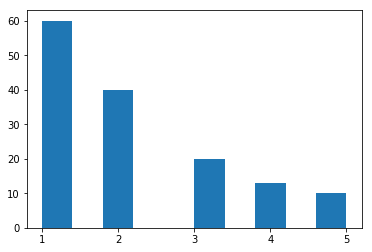

In [21]:
my_list = []
correct_ans = 1
agreement_val = 0.6
for i in np.arange(1, 6):
    if i == correct_ans:
        my_list += [str(correct_ans)] * int(agreement_val * 100)
    else:
        my_list += [str(i)] * int((1 - agreement_val) / abs(correct_ans - i) * 100)
plt.hist(my_list)
plt.show()

710
1610
0 1610
200
['610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '660', '661', '661', '662', '662', '663', '663', '664', '664', '665', '665', '666', '666', '667', '667', '668', '668', '669', '669', '670', '670', '671', '671', '672', '672', '673', '673', '674', '674', '675', '675', '676', '676', '677', '677', '677', '678', '678', '678', '679', '679', '679', '680', '680', '680', '681', '681', '681', '682', '682', '682', '683', '683', '683', '684', '684', '684', '685', '685', '685', '685', '686', '686', '686', '686', '687', '687', '687', '687', '688', '688', '688', '688', '689', '689', '689', '689', '690', '690', '690', '690', '690', '691', '691', '691', '691', '691', '692', '692',

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


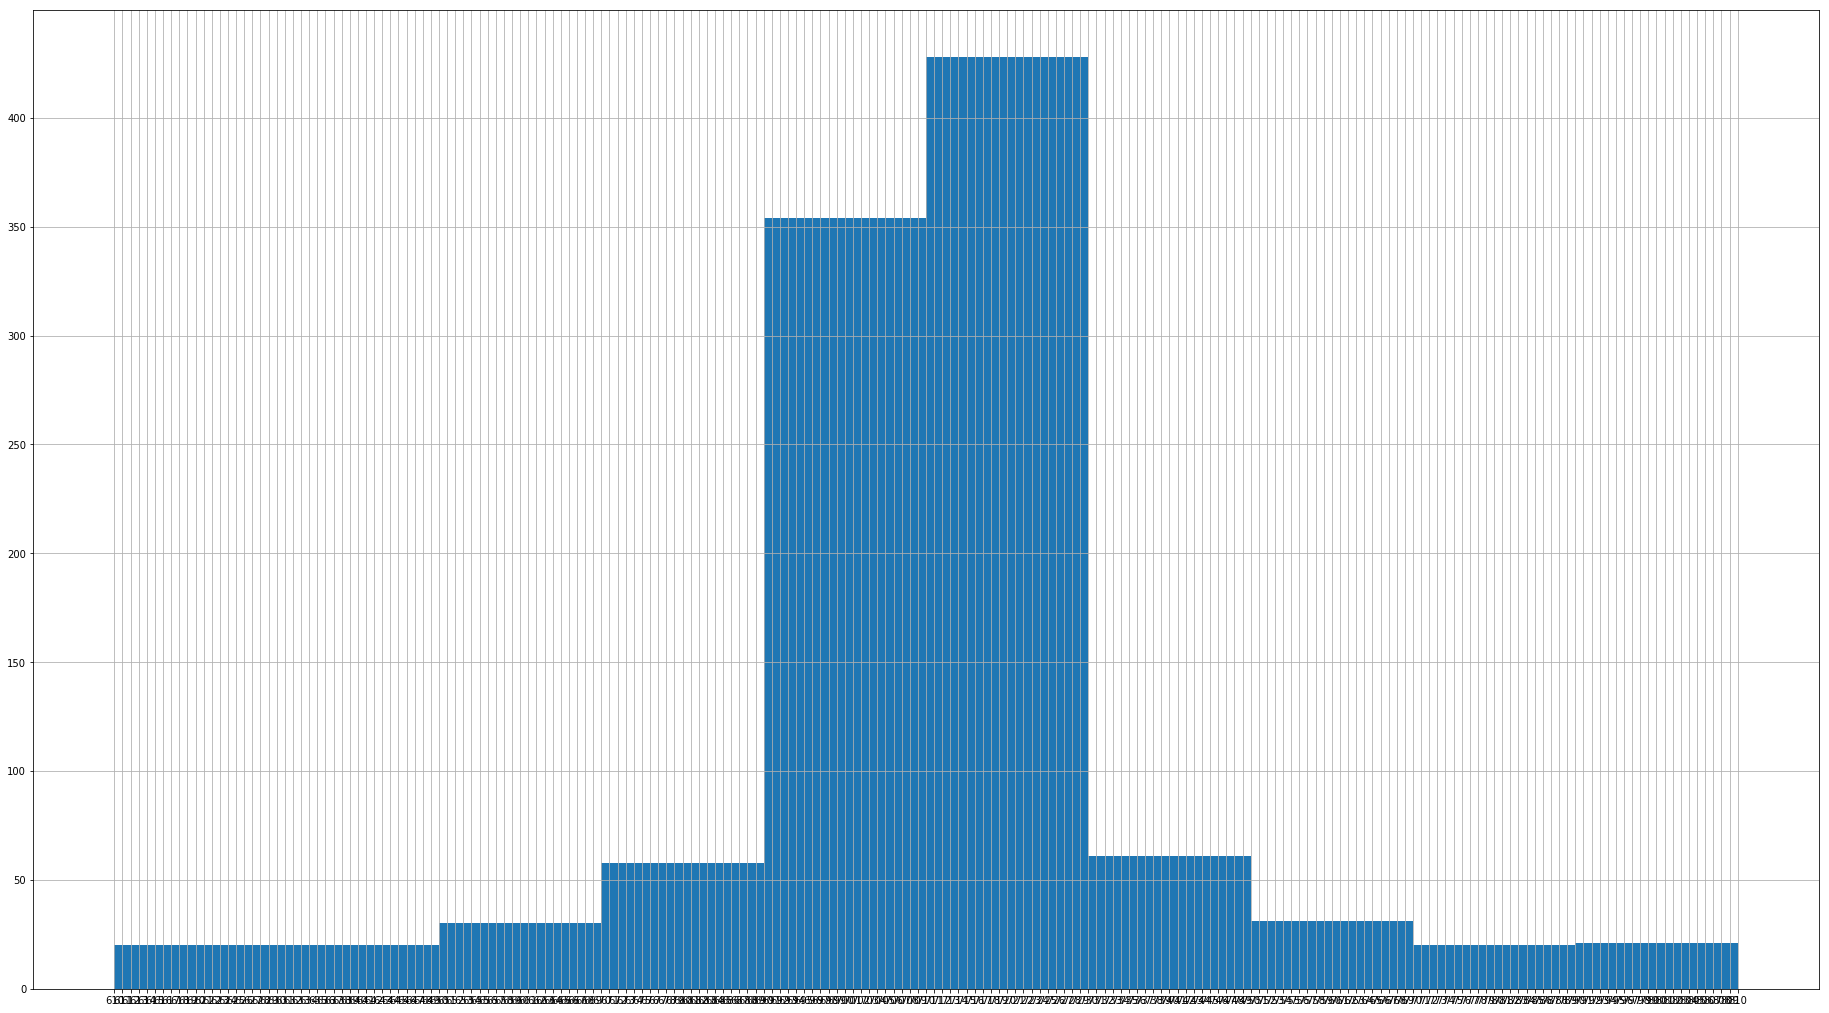

In [39]:
source_length = 2000
correct_ans = rand.randint(source_length / 4, source_length / 2)
#correct_ans = rand.randint(correct_start, source_length)
agreement_val = 0.1
pos_range = int((1 - agreement_val) / 2 * source_length)
start = correct_ans - pos_range
end = correct_ans + pos_range + 1
if start < 0:
    start = 0
if end > source_length:
    end = source_length
interval = np.arange(start, end)
result = []
for i in interval:
    if i == correct_ans:
        result += [str(i)] * int(agreement_val ** agreement_val * 100)
    else:
        result += [str(i)] * int(agreement_val / (abs(correct_ans - i) * agreement_val)  * 100)
print(correct_ans)
print(int(interval[len(interval) - 1]) - int(interval[0]))
print(int(interval[0]), int(interval[len(interval) - 1]))
print(int(result[len(result) - 1]) - int(result[0]))
print(result)
plt.figure(figsize = (32, 18))
plt.grid('on')
plt.hist(result)
plt.show()

1114
1140


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


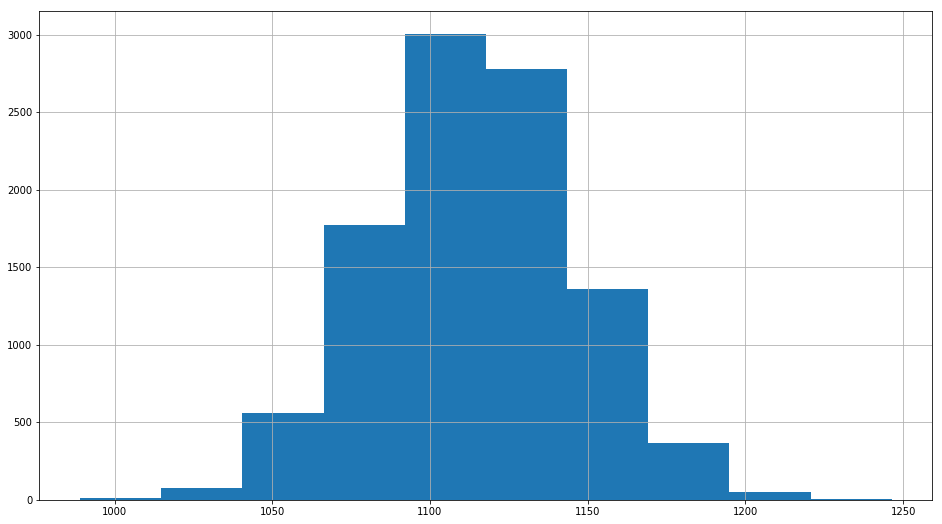

In [78]:
agreement_val = 0.75
source_length = 4000
correct_ans = rand.randint(source_length / 4, source_length / 2)
print(correct_ans)
normal = np.random.normal(correct_ans, (1 - agreement_val) * 2 * source_length ** 0.5, 10000)
print(int(rand.choice(normal)))
plt.figure(figsize = (16, 9))
plt.grid('on')
plt.hist(normal)
plt.show()

In [61]:
normal

array([1299.81542388, 1298.62059685, 1303.43140591, ..., 1300.91581038,
       1302.3158684 , 1304.22110321])